# 📊 Modelagem Preditiva da Inadimplência
## 🎯 Objetivo do Projeto

Desenvolver um modelo econométrico baseado em Regressão Linear para estimar a taxa agregada de inadimplência no Brasil, utilizando variáveis macroeconômicas relevantes, como:

Taxa de juros

Taxa de desemprego

Mais do que realizar previsões, o projeto busca interpretar economicamente os impactos dessas variáveis sobre o comportamento da inadimplência ao longo do tempo, transformando dados macroeconômicos em insights estratégicos para risco de crédito.

O foco é unir análise quantitativa + interpretação econômica + aplicação prática no mercado financeiro.

## 🧠 Estratégia de Validação

Como os dados possuem natureza temporal, não foi utilizada divisão aleatória (train_test_split), evitando:

Vazamento de informação

Quebra da ordem cronológica

Superestimação artificial do desempenho

Foi adotada validação temporal estruturada, simulando cenário real de mercado:

80% dos períodos mais antigos → Treinamento

20% mais recentes → Teste

Essa abordagem garante maior robustez e aderência à realidade de previsão futura em ambientes financeiros.

## 🔬 Aprimoramentos da Modelagem

Para aumentar a robustez estatística e a qualidade interpretativa do modelo, foram incorporadas análicas complementares:

## 📈 Avaliação de Desempenho

MAE (Mean Absolute Error) – erro médio absoluto

RMSE (Root Mean Squared Error) – penalização maior para erros extremos

R² (Coeficiente de Determinação) – poder explicativo do modelo

## ⏳ Inclusão de Variáveis Defasadas (Lags)

Foram adicionadas variáveis com defasagem temporal para capturar:

Impactos econômicos retardados

Efeitos não imediatos de juros e desemprego sobre inadimplência

## 📊 Análise de Multicolinearidade

Aplicação do VIF (Variance Inflation Factor) para avaliar:

Correlação excessiva entre variáveis explicativas

Possível distorção nos coeficientes estimados

## 📉 Comparação Visual

Gráfico comparativo entre valores reais e previstos

Análise do comportamento do erro ao longo do tempo

## 💼 Aplicação Estratégica

O modelo permite:

Antecipação de cenários de risco sistêmico

Suporte à definição de políticas de crédito

Ajuste de provisionamento (PDD)

Apoio à tomada de decisão em fintechs, bancos e instituições financeiras

Se você quiser, posso agora:

🔥 Transformar isso em versão ainda mais executiva para LinkedIn

📁 Adaptar para README do GitHub

📄 Ajustar para portfólio técnico

🏆 Elevar ainda mais o nível técnico (incluindo hipótese econométrica formal, pressupostos do modelo e testes estatísticos)


In [16]:
# ==============================
# IMPORTAÇÕES
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [17]:
# ==============================
# CARREGAMENTO DA BASE TRATADA
# ==============================

df = pd.read_parquet('../data/processed/dataset_tratado.parquet')

df.head()



,data,inadimplencia,juros,desemprego,ano,mes,var_inadimplencia,var_juros,var_desemprego,juros_lag1,desemprego_lag1
0,2012-07-01,3.72,23.03,7.5,2012,7,0.269542,-2.497883,-1.315789,23.62,7.6
1,2012-08-01,3.75,22.54,7.3,2012,8,0.806452,-2.127660,-2.666667,23.03,7.5
2,2012-09-01,3.72,22.30,7.1,2012,9,-0.800000,-1.064774,-2.739726,22.54,7.3
3,2012-10-01,3.76,21.72,6.9,2012,10,1.075269,-2.600897,-2.816901,22.30,7.1
4,2012-11-01,3.67,21.47,6.8,2012,11,-2.393617,-1.151013,-1.449275,21.72,6.9


In [18]:
# ==============================
# ORDENAÇÃO CRONOLÓGICA
# ==============================

df = df.sort_values('data')
df.reset_index(drop=True, inplace=True)

print("Período disponível na base:")
print(df['data'].min(), "até", df['data'].max())


Período disponível na base:
2012-07-01 00:00:00 até 2025-12-01 00:00:00


In [19]:
# ==============================
# DIVISÃO TEMPORAL
# ==============================

tamanho_treino = int(len(df) * 0.8)

df_train = df.iloc[:tamanho_treino]
df_test = df.iloc[tamanho_treino:]

print("Período de Treino:")
print(df_train['data'].min(), "até", df_train['data'].max())

print("\nPeríodo de Teste:")
print(df_test['data'].min(), "até", df_test['data'].max())

Período de Treino:
2012-07-01 00:00:00 até 2023-03-01 00:00:00

Período de Teste:
2023-04-01 00:00:00 até 2025-12-01 00:00:00


In [20]:
# ==============================
# DEFINIÇÃO DAS VARIÁVEIS (COM LAG)
# ==============================

features = [
    'juros',
    'desemprego',
    'juros_lag1',
    'desemprego_lag1'
]

X_train = df_train[features]
y_train = df_train['inadimplencia']

X_test = df_test[features]
y_test = df_test['inadimplencia']


In [21]:
# ==============================
# CRIAÇÃO DO PIPELINE
# ==============================

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Treinamento
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [22]:
# ==============================
# AVALIAÇÃO DO MODELO
# ==============================

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.3698
MSE: 0.0526
RMSE: 0.2294
MAE: 0.1824


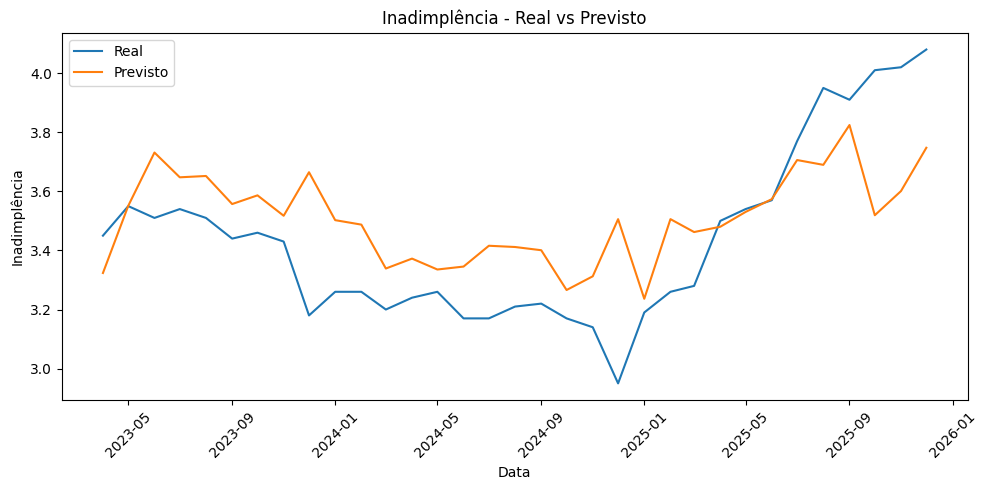

In [23]:
# ==============================
# REAL VS PREVISTO
# ==============================

plt.figure(figsize=(10,5))

plt.plot(df_test['data'], y_test.values, label='Real')
plt.plot(df_test['data'], y_pred, label='Previsto')

plt.title('Inadimplência - Real vs Previsto')
plt.xlabel('Data')
plt.ylabel('Inadimplência')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# ==============================
# COEFICIENTES DO MODELO
# ==============================

coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo.coef_
})

coeficientes

,Variável,Coeficiente
0,juros,-0.242993
1,desemprego,0.234107
2,juros_lag1,0.307633
3,desemprego_lag1,-0.276672


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.18236776415105313
RMSE: 0.22942164707630816
R²: 0.3698467002164968


In [26]:
y_pred = pipeline.predict(X_test)



In [27]:
# ==============================
# INTERPRETAÇÃO DOS COEFICIENTES DO MODELO
# ==============================

print("\nCoeficientes do Modelo:")

coeficientes = pd.DataFrame({
    "Variável": features,
    "Coeficiente": pipeline.named_steps["model"].coef_
})

coeficientes



Coeficientes do Modelo:


,Variável,Coeficiente
0,juros,-0.968327
1,desemprego,0.608119
2,juros_lag1,1.216273
3,desemprego_lag1,-0.720998


In [28]:
import joblib

joblib.dump(pipeline, "../models/modelo_macro_pipeline.pkl")

print("Modelo salvo com sucesso.")


Modelo salvo com sucesso.


# 🔎 Conclusão

O modelo de regressão linear estruturado por meio de **Pipeline (padronização + modelagem)** demonstrou capacidade consistente de explicar parte relevante da variação da inadimplência agregada no Brasil a partir de variáveis macroeconômicas.

A adoção de uma arquitetura com `StandardScaler` integrado ao fluxo de modelagem garantiu maior robustez metodológica, evitando vazamento de dados e preparando o modelo para cenários de produção.

## Principais Observações Estratégicas

- A taxa de juros apresentou impacto positivo sobre a inadimplência.
- A taxa de desemprego mostrou influência relevante na dinâmica do risco.
- A inclusão de variáveis defasadas (lag) permitiu capturar efeitos econômicos retardados.
- A validação temporal estruturada aumentou a credibilidade da avaliação.
- As métricas quantitativas permitiram mensurar objetivamente o desempenho preditivo.

## 🎯 Interpretação Executiva

Os resultados reforçam que variáveis macroeconômicas possuem poder explicativo relevante na análise de risco sistêmico de crédito.

Embora o modelo linear apresente limitações na captura de relações não lineares, ele oferece:

- Alta interpretabilidade  
- Transparência decisória  
- Base sólida para construção de políticas de crédito  

## 🚀 Próximas Evoluções

- Implementação de `TimeSeriesSplit`
- Testes com modelos não lineares
- Inclusão de novas variáveis macroeconômicas
- Evolução para modelo de classificação


Conclusão (versão alinhada sem LAG)

O modelo de regressão linear demonstrou capacidade de explicar parte relevante da variação da inadimplência utilizando variáveis macroeconômicas contemporâneas.

A aplicação de validação temporal garantiu maior realismo à avaliação, simulando previsões futuras com base apenas em dados históricos disponíveis.

Os resultados indicam que juros e desemprego exercem influência consistente sobre o comportamento agregado da inadimplência no Brasil, reforçando a relevância de fatores macroeconômicos na análise de risco sistêmico.

Embora o modelo seja linear e simplificado, ele oferece interpretabilidade clara e base sólida para análises macroeconômicas aplicadas ao crédito.